In [44]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

2086.5428571428574


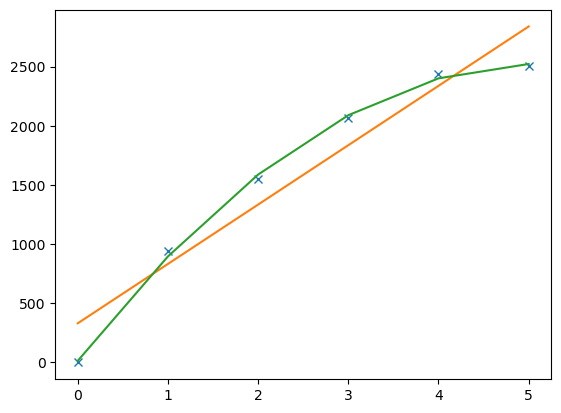

In [11]:
#5.0
x = np.arange(0,6,1)
F = np.array([0,940,1554,2069,2438,2509])
ordnung1 = np.polyfit(x,F,1)
ordnung2 = np.polyfit(x,F,2)

x35=np.polyval(ordnung1,3.5)
print(x35)
#print(x,F,ordnung1)
plt.plot(x,F,'x')
plt.plot(x,np.polyval(ordnung1,x))
plt.plot(x,np.polyval(ordnung2,x))
plt.show()


[-1.02660917e-15 -2.00000000e+00]
Das Fahrzeug hat nach 5 Sekunden einen Weg von 192.3713042193879m zurückgelegt.
Das Fahrzeug hat nach 35 Sekunden einen Weg von 2354.52434491933m zurückgelegt.


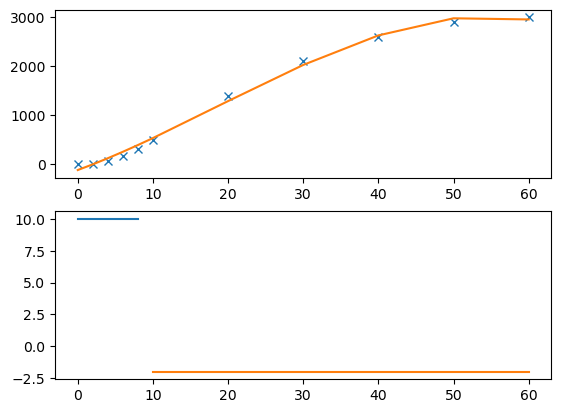

In [42]:
#5.1
t=np.array([0,2,4,6,8,10,20,30,40,50,60])
x=np.array([0,20,80,180,320,500,1400,2100,2600,2900,3000])




#Interpolation
p_beschleunigen = np.polyfit(t[:5],x[:5],3)
p_bremsen = np.polyfit(t[5:],x[5:],3)
p = np.polyfit(t,x,3)

# berechnug der fehleden Werte
x5 = np.polyval(p,5)
x35 = np.polyval(p,35)

# Bilden der Ableitung

p_p = np.polyder(p)
p10_p = np.polyder(p_beschleunigen)
p50_p = np.polyder(p_bremsen)
p_pp = np.polyder(p_p) 
p10_pp = np.polyder(p10_p)
p50_pp = np.polyder(p50_p)
print(p50_pp)

print(f'Das Fahrzeug hat nach 5 Sekunden einen Weg von {x5}m zurückgelegt.')
print(f'Das Fahrzeug hat nach 35 Sekunden einen Weg von {x35}m zurückgelegt.')

plt.figure()
plt.subplot(2,1,1)
plt.plot(t,x,'x')
plt.plot(t,np.polyval(p,t))
plt.subplot(2,1,2)
plt.plot(t[:5],np.polyval(p10_pp,t[:5]))
plt.plot(t[5:],np.polyval(p50_pp,t[5:]))
plt.show()

/var/folders/2b/5lvf8bqx2pq9vmy39gcbrlnh0000gn/T/ipykernel_30055/1101033602.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_E = df_filtered[(df['Dehnung 1']<0.0025)& df['Dehnung 1']>0.0005]


   Zeit  Traversenweg   Last  Dehnung 1  Zugspannung
0   0.0        0.0000  0.060    0.00037        17.33
1   0.1        0.0004  0.063    0.00043        18.37
2   0.2        0.0012  0.064    0.00048        18.52
3   0.3        0.0028  0.067    0.00085        19.29
4   0.4        0.0059  0.076    0.00224        22.06 [2217.42717112   17.17596865]


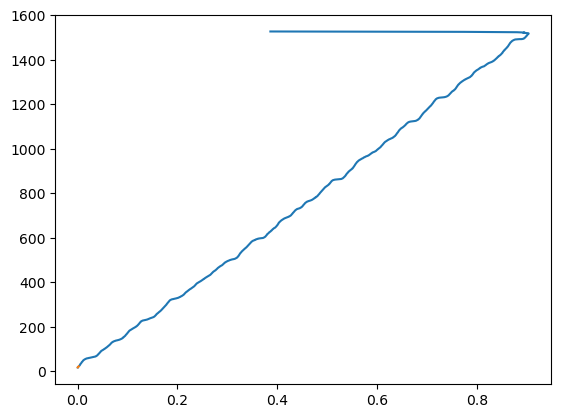

In [88]:
# 5.2
file_path1 = '/Users/maxgeiger/Documents/Simulation-technischer-Systeme-mit-Python/Klausurvorbereitung/Übungen/UE5_Specimen_RawData_1.csv'
df = pd.read_csv(file_path1, sep=';',decimal=',',header=3, skiprows=[5] )

# daten filtern
df_filtered = df[(df['Dehnung 1']>=0)]

# berechnung der Spannung:
s0=3.4
#df_filtered['Spannung'] = df_filtered[df['Last']]/s0
#berechnung E-Modul
df_E = df_filtered[(df['Dehnung 1']<0.0025)& df['Dehnung 1']>0.0005]
p = np.polyfit(df_E['Dehnung 1'],df_E['Zugspannung'],1)
E = np.polyval(p,df_E['Dehnung 1'])


print(df_E,p)
plt.plot(df_filtered['Dehnung 1'],df_filtered['Zugspannung'])
plt.plot(df_E['Dehnung 1'],E)
plt.show()
